## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Name: Zach Zazueta
<br>
Pace: Part time
<br>
Project review date/time: August 29th, 2019 @ 5:30pm EST
<br>
Instructor: Abhineet Kulkarni
<br>
Blog post URL: Will add this asap

In [1]:
# Your code here - remember to use markdown cells for comments as well!

# General Approach for Project 1

My plan for the project was to follow the Data Science cycle learned in Mod 1. I knew there would be a need to clean the data and that I would start to lean more about the impact of the independent variables on price. The following the cleaning process, some initial visualizations gave me a better understanding of what variables I would be able to include for my final regression model. After building that out, I was able to understand the regression equation and translate it back to the data. The final step was returning to the initial data set and pulling out some insights for the presentation.

(this writeup was completed after all code had been written)

# Business Understanding

I will be working with a set of data that includes a number of home sale prices and other information about those homes from King County in Washington state. The homes sold between May '14 and May '15. I will be determining some of the features of these homes that are most influential on sell price, and presenting these findings to a group of real estate investors.

# Data Mining

Importing my necessary libraries and collecting the data set provided.

In [2]:
import pandas as pd #import basic libraries
import numpy as np
import statsmodels.api as sm #import various stats packages for the modeling I will do
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt #import matplotlib and seaborn for viz
%matplotlib inline

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

plt.style.use('seaborn-pastel') #set graphing style
sns.set_context('notebook')

In [3]:
df = pd.read_csv('kc_house_data.csv') #view the data to understand what I am looking at
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   
5    101930     1.0         0.0   0.0     ...         11        3890   
6      6819     2.0         0.0   0.0     ...          7        1715   
7      9711     1.0         0.0   NaN     ...          7        1060   
8      7470     1.0         0.0   0.0     ...          7        1050   
9      6560     2.0         0.0   0.0     ...          7        1890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   
6              ?     1995           0.0    98003  47.3097 -122.327   
7            0.0     1963           0.0    98198  47.4095 -122.315   
8          730.0     1960           0.0    98146  47.5123 -122.337   
9            0.0     2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

# Data Exploration and Cleaning

Following our inital look at the data set, we need to clean it

In [4]:
df.describe() #see what the min, max, median, mean are of the data to start and understand what we are looking at

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

My observations for the summary:
1. There are 21,597 initial rows (pre-cleaning) - I'll want to be sure to check for duplicate home ids.
2. There are mostly continuous variables, with a few that are potentially categorical.
3. Looking at max values and standard deviations, there are a fair number of outliers in the data set that will need to be removed.
4. I should likely investigate the scale that is being used for grade, as the values appear to range from 3-13.
5. Clarifying question - should sqft_above and sqft_basement sum to sqft_livingsquare? Assumption is yes.
6. Yr_renovated seems to contain both many zero values. 
7. A quick comparison of the first 10 rows of data show that sqft_living15 can be different than sqft_living (which suggests a renovation has occurred), even when yr_renovated is 0.0. This column seems problematic.
8. Zipcode should likely act as a categorical variable
9. I will likely use lat or long for map viz.

In [5]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n') 
    # this is to check for equal distribution of independent variable outputs

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

Quick notes:
- There are a few standard size lots (4- , 5-, & 6000)
- Few homes have 2.5 floors
- Less than 1% of homes have waterfront
- 90% of homes have not been viewed
- Only 1% of homes are a 1 or 2 for condition, the rest are 3+
- 60% of homes don't have a basement - that seems high. 2% of homes have '?' entered for basement sqft
- 96% of homes have 0 entered for yr_renovated - that would have to denote Not Renovated

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Observations for data:
1. Date should be converted to a date-time object.
2. sqft_basement should be converted to an integer.

In [7]:
df.isna().sum() #see which values have null/nan values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df.yr_renovated.isna().sum()/len(df.yr_renovated)

0.17789507802009538

Observations for missing data:
1. Waterfront - this would be a difficult one to clean, as it is a yes or no question "Does the property have views of the waterfront?". The answer to that question would likely have major impact on a home value in the real-world (Location, location, location!), so I would steer away from a median replacement. I will likely fill NaN values with a '2', creating a third category ('data unavailable'). Another approach could be to group homes by zipcode and do a proportional replacement.
2. I will drop the 63 NaNs for view - the loss of 63 rows will not impact outcome.
3. I will drop the yr_renovated column - 17% have null values, and it seems like renovations could have been made to homes that are not captured with a year. I've determined this by noticing sqft_living15 is larger than sqft_living, which signals a renovation, but yr_renovated is marked as 0.

In [9]:
df = df.drop('yr_renovated', axis=1) #drop yr_renovated

In [10]:
df.waterfront = df.waterfront.fillna(value=2) #create a third 'missing values' category (2) for waterfront
#set waterfront to be category type - because 2 is unspecified and could be yes or no, moving between units should not
#impact the dependent variable
df.waterfront = df.waterfront.astype('category')

In [11]:
df = df.dropna() #drop the 63 rows with missing value for view
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Observations:
Null values have been dealt with. I now need to adjust my data types accordingly.

In [12]:
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = df['sqft_living'] - df['sqft_above']
#this does a quick replacement to determine the total living space and the sq footage of the basement
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int) #sets the Series type to int

In [13]:
df.zipcode.nunique() # housing is split across 70 unique zip codes

70

In [14]:
df.zipcode = df.zipcode.astype('category') 
#I'm doing this because continuous designation of zipcode does not represent a quality of the area.

In [15]:
df.date = pd.to_datetime(df.date, infer_datetime_format=True) #date to datetime
df['month'] = df.date.map(lambda x: x.month) # add column for month to trend price over time of year

In [16]:
#convert Month into seasons: 2 = Winter, 3 = Spring, 4 = Summer, 1 = Fall
conditions = [(df['month'] == 1) | (df['month'] == 2) | (df['month'] == 12),
             (df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5),
             (df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8),
             (df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11)]
choices = [2, 3, 4, 1]
df['season'] = np.select(conditions, choices)
df.season = df.season.astype('category')

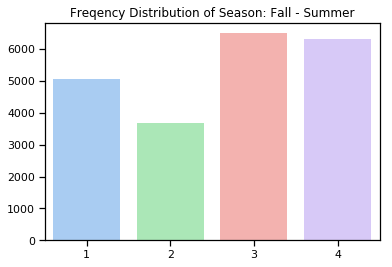

In [17]:
season_count = df['season'].value_counts() #I'm curious about the distribution of home sales by season
sns.barplot(season_count.index, season_count.values, alpha=0.9)
plt.title('Freqency Distribution of Season: Fall - Summer')
plt.show()

In [18]:
df = df.convert_objects(convert_numeric=True) #convert all possible data types to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null category
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int32
yr_built         21534 non-null int64
zipcode          21534 non-null category
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
month            21534 non-null int64
season           21534 non-null category
dtypes: category(3), date

C:\Users\zazue\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


I am nearly done with cleaning, just need to check for duplicates and remove outliers.

In [19]:
#duplicates becomes the data set that contains all 177 homes, and all occurrances of them selling 
#353 occurances for 177 homes
id_duplicates = df.loc[df.id.duplicated(keep=False),:]
print(len(df.loc[df.id.duplicated(), :]))
print(len(id_duplicates))
id_duplicates.sort_values('id').head()

177
353


id       date     price  bedrooms  bathrooms  sqft_living  \
2495     1000102 2015-04-22  300000.0         6       3.00         2400   
2494     1000102 2014-09-16  280000.0         6       3.00         2400   
16800    7200179 2014-10-16  150000.0         2       1.00          840   
16801    7200179 2015-04-24  175000.0         2       1.00          840   
11422  109200390 2014-10-20  250000.0         3       1.75         1480   

       sqft_lot  floors waterfront  view   ...    sqft_above  sqft_basement  \
2495       9373     2.0        0.0   0.0   ...          2400              0   
2494       9373     2.0        2.0   0.0   ...          2400              0   
16800     12750     1.0        0.0   0.0   ...           840              0   
16801     12750     1.0        0.0   0.0   ...           840              0   
11422      3900     1.0        0.0   0.0   ...          1480              0   

       yr_built  zipcode      lat     long  sqft_living15  sqft_lot15  month  \
2495       1991    98002  47.3262 -122.214           2060        7316      4   
2494       1991    98002  47.3262 -122.214           2060        7316      9   
16800      1925    98055  47.4840 -122.211           1480        6969     10   
16801      1925    98055  47.4840 -122.211           1480        6969      4   
11422      1980    98023  47.2977 -122.367           1830        6956     10   

       season  
2495        3  
2494        1  
16800       1  
16801       3  
11422       1  

[5 rows x 22 columns]

This code uncovers that 177 homes account for 353 rows, which means that some homes sold multiple times. I want to keep the 177 homes in my working data set, but remove the duplicative instances.
I don't have reason to believe there was a particular order for these duplicates in the original dataframe, so I will keep the first occurrance of each of the 177 homes.

In [20]:
df = df.drop_duplicates('id', keep='first')
df = df.drop(['date'], axis=1)

Now that I know I have uniqe housing information, I can set my housing id to my index

In [21]:
df = df.set_index('id')

I will now drop outlier rows outside of 3 standard deviataions

In [22]:
df.describe() #the revised look at the data without null values

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.135700e+04  21357.000000  21357.000000  21357.000000  2.135700e+04   
mean   5.404997e+05      3.373788      2.118322   2082.642834  1.511924e+04   
std    3.666157e+05      0.925514      0.768334    918.147434  4.149855e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.225000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.613000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069600e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors          view     condition         grade    sqft_above  \
count  21357.000000  21357.000000  21357.000000  21357.000000  21357.000000   
mean       1.496020      0.234677      3.410685      7.662312   1791.138175   
std        0.540206      0.766459      0.650143      1.171407    828.681607   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1200.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2220.000000   
max        3.500000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built           lat          long  sqft_living15  \
count   21357.000000  21357.000000  21357.000000  21357.000000   21357.000000   
mean      291.504659   1971.095894     47.560285   -122.213749    1988.066255   
std       442.404725     29.387983      0.138566      0.140802     685.428458   
min         0.000000   1900.000000     47.155900   -122.519000     399.000000   
25%         0.000000   1952.000000     47.471300   -122.328000    1490.000000   
50%         0.000000   1975.000000     47.572200   -122.230000    1840.000000   
75%       560.000000   1997.000000     47.678100   -122.125000    2370.000000   
max      4820.000000   2015.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15         month  
count   21357.000000  21357.000000  
mean    12768.505876      6.591984  
std     27326.770308      3.106559  
min       651.000000      1.000000  
25%      5100.000000      4.000000  
50%      7620.000000      6.000000  
75%     10087.000000      9.000000  
max    871200.000000     12.000000

#### Question:
Where are the outliers for price?

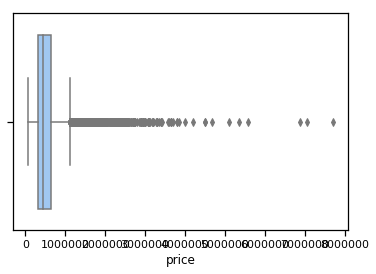

In [23]:
sns.boxplot(x=df['price']); #use a boxplot to best visualize the outliers

#### Answer:
Homes above ~$1.25MM look to fall outside of the normal data distribution

In [24]:
len(df[df['price'] > 1638000])/len(df['price']) #mean + 3 stds ~=$1,638,000

0.01901016060308096

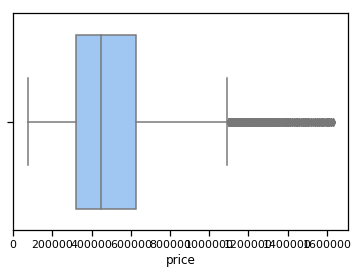

In [25]:
df = df[df['price'] <= 1638000] #choosing to drop all homes that sold 3+ stds above average sell price
sns.boxplot(x=df['price']);

In [26]:
#drop other rows that have outliers above 3 stds for a number of categories
df = df[df['bedrooms'] <= 7] #mean + 3 stds ~=6.13, round up to 7 since you can't have a half bedroom
df = df[df['bathrooms'] <= 4.5] #mean + 3 stds ~= 4.4, round up to 4.5 since you can have a half bath
df = df[df['sqft_living15'] <= 4043] #mean + 3 stds ~=4,043
df = df[df['sqft_above'] <= 4275] #mean + 3 stds ~=4,275
df = df[df['sqft_lot15'] <= 94750] #mean + 3 stds ~=94,750
df = df[df['sqft_basement'] <= 1620] #mean + 3 stds ~=1,620

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20205 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
price            20205 non-null float64
bedrooms         20205 non-null int64
bathrooms        20205 non-null float64
sqft_living      20205 non-null int64
sqft_lot         20205 non-null int64
floors           20205 non-null float64
waterfront       20205 non-null category
view             20205 non-null float64
condition        20205 non-null int64
grade            20205 non-null int64
sqft_above       20205 non-null int64
sqft_basement    20205 non-null int32
yr_built         20205 non-null int64
zipcode          20205 non-null category
lat              20205 non-null float64
long             20205 non-null float64
sqft_living15    20205 non-null int64
sqft_lot15       20205 non-null int64
month            20205 non-null int64
season           20205 non-null category
dtypes: category(3), float64(6), int32(1), int64(10)
memory usage: 2.8 MB


In [28]:
df.describe() #now we have the data without the outliers

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.020500e+04  20205.000000  20205.000000  20205.000000  2.020500e+04   
mean   4.954798e+05      3.331799      2.059837   1978.601881  1.146724e+04   
std    2.465534e+05      0.867071      0.705189    758.948303  2.628452e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.150010e+05      3.000000      1.500000   1400.000000  5.000000e+03   
50%    4.400000e+05      3.000000      2.250000   1870.000000  7.439000e+03   
75%    6.150000e+05      4.000000      2.500000   2450.000000  1.011700e+04   
max    1.630000e+06      7.000000      4.500000   5610.000000  1.164794e+06   

             floors          view     condition         grade    sqft_above  \
count  20205.000000  20205.000000  20205.000000  20205.000000  20205.000000   
mean       1.484657      0.186983      3.411136      7.559911   1710.877308   
std        0.539668      0.673096      0.649448      1.051832    714.984100   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1180.000000   
50%        1.000000      0.000000      3.000000      7.000000   1520.000000   
75%        2.000000      0.000000      4.000000      8.000000   2120.000000   
max        3.500000      4.000000      5.000000     12.000000   4270.000000   

       sqft_basement      yr_built           lat          long  sqft_living15  \
count   20205.000000  20205.000000  20205.000000  20205.000000   20205.000000   
mean      267.724573   1970.548627     47.560304   -122.217799    1924.540163   
std       398.713738     29.421252      0.139009      0.138896     607.803858   
min         0.000000   1900.000000     47.155900   -122.514000     460.000000   
25%         0.000000   1951.000000     47.469800   -122.331000    1470.000000   
50%         0.000000   1974.000000     47.571400   -122.239000    1800.000000   
75%       530.000000   1996.000000     47.679700   -122.130000    2290.000000   
max      1620.000000   2015.000000     47.777600   -121.315000    4042.000000   

         sqft_lot15         month  
count  20205.000000  20205.000000  
mean    9487.054195      6.589112  
std     9823.229308      3.107195  
min      651.000000      1.000000  
25%     5000.000000      4.000000  
50%     7500.000000      6.000000  
75%     9750.000000      9.000000  
max    94663.000000     12.000000

Some quick research shows that a higher grade signifies a higher grade building material and therefore would be a more expensive build. I will not make grade categorical.

My last step of the data manipulation process will be to create dummy variables for the categorical variables, then drop the original categorical variables.

In [29]:
seas_dummies = pd.get_dummies(df['season'], prefix='seas', drop_first=True) 
#drop_first = True, drops the first dummy variable to avoid the dummy variable trap of covariance
water_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

In [30]:
df = df.drop(['season', 'waterfront', 'zipcode'], axis=1)

# Initial Modeling

It is time to start to vizualize the data to understand how the variables interact with one another. The three assumptions I want to look for are:
- Is there a linear relationship between the independent and dependent variables?
- Is there a normal distribution of risiduals?
- Are variables distributed equally along a regression line?

#### Question:
What is the distrubution of the cleaned data?

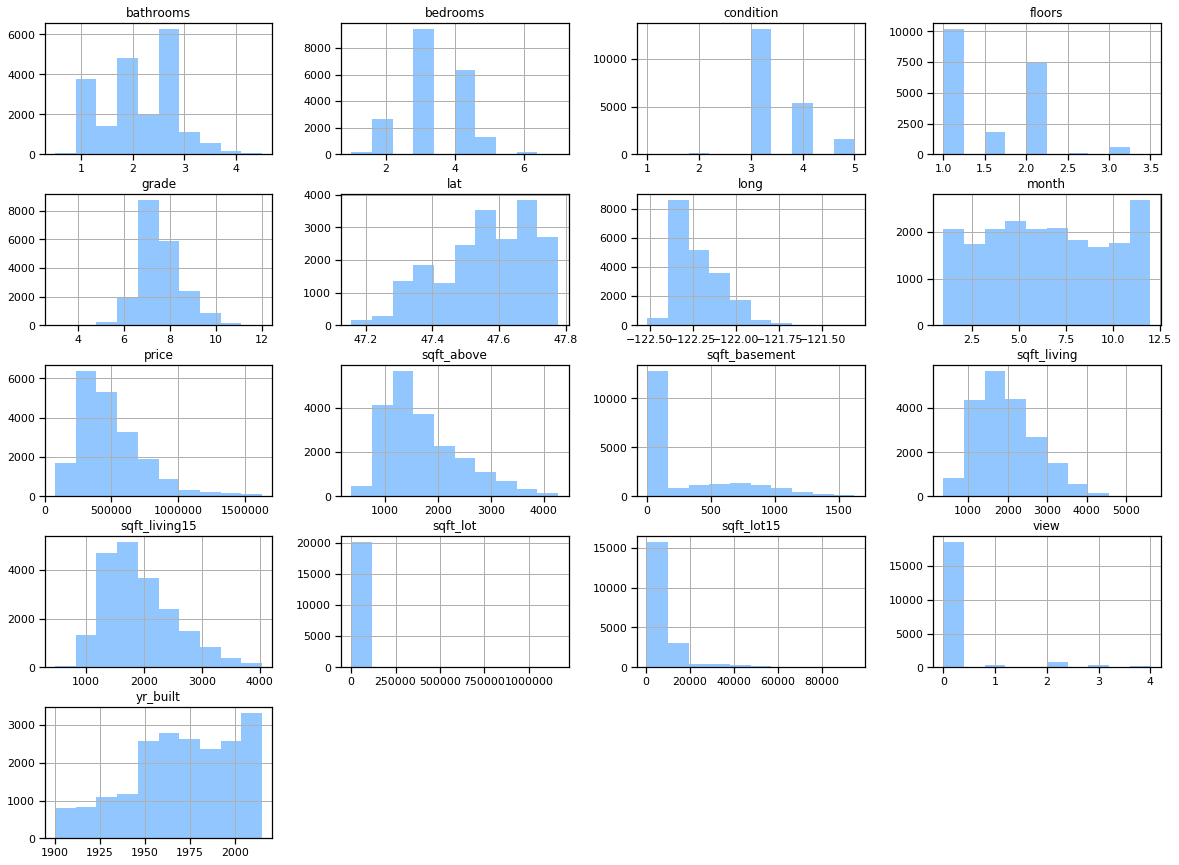

In [31]:
df.hist(figsize=(20,15)); #histograms allow us to see how normally distributed the variables are or aren't.

#### Answer:
Some are fairly normally distributed. Others, like lat and long, are not quite as normal.

In [32]:
df_with_cat = pd.concat([df, seas_dummies, water_dummies, zip_dummies], axis=1) #now I can bring in the dummy variables

Check for linearity

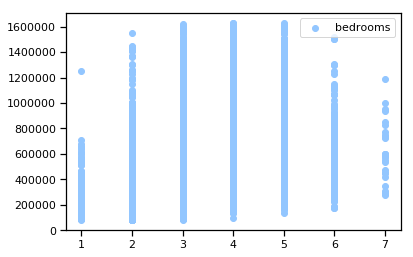

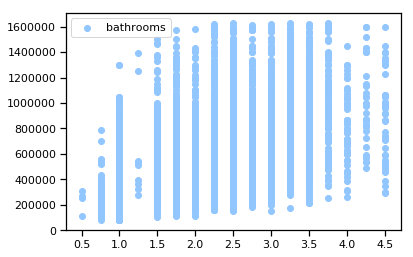

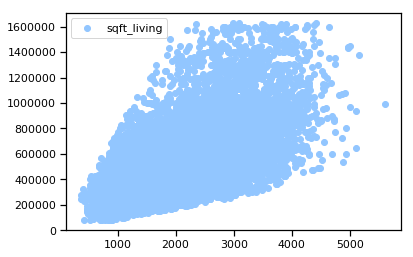

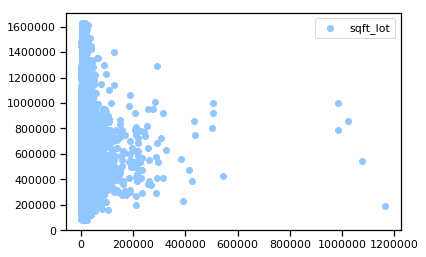

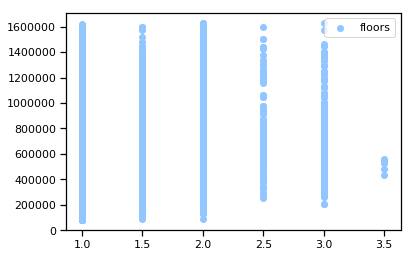

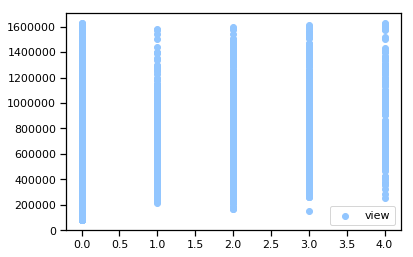

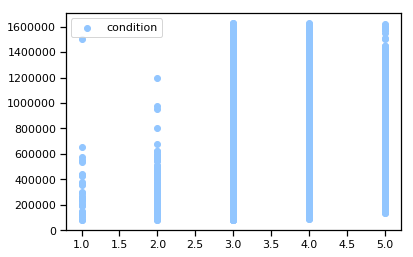

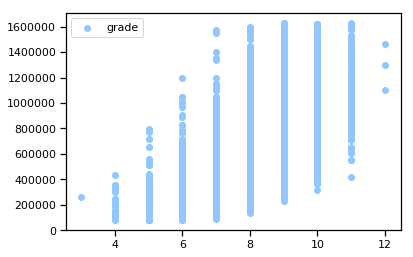

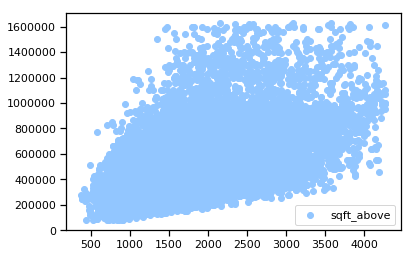

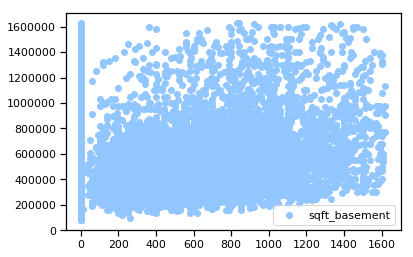

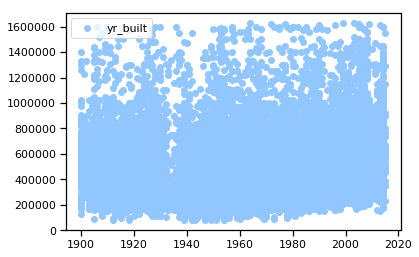

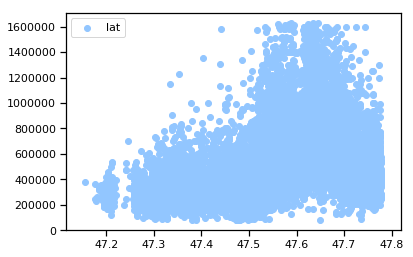

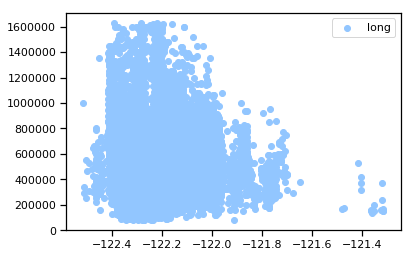

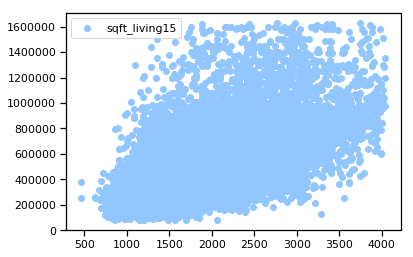

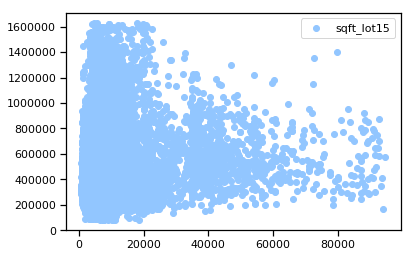

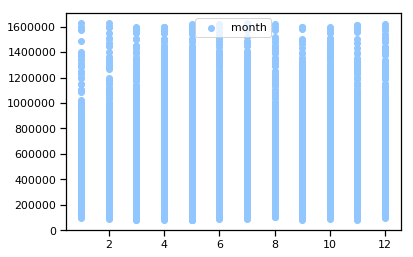

In [33]:
columns = df.drop('price', axis=1)
for x in columns:
    plt.scatter(columns[x], df.price, label=x)
    plt.legend()
    plt.show()

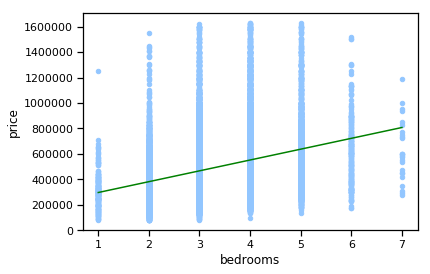

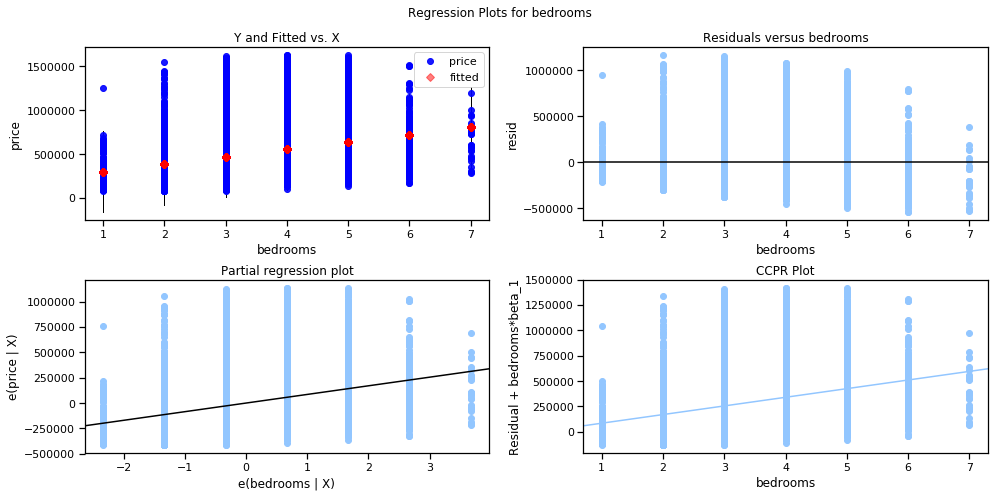

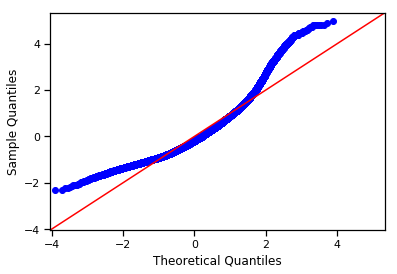

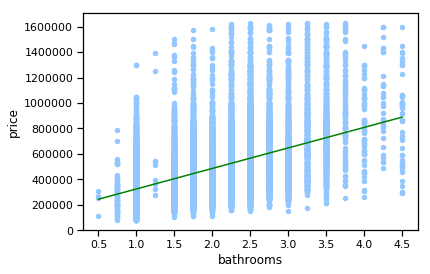

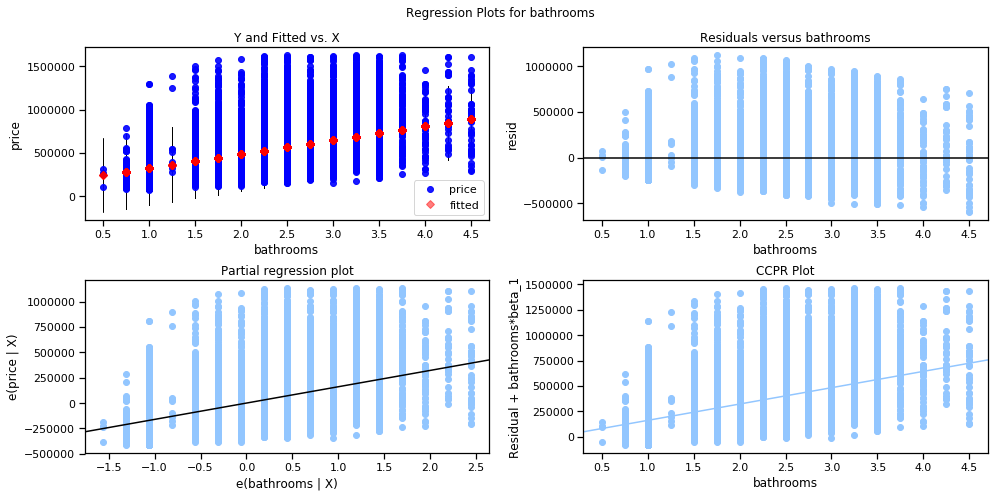

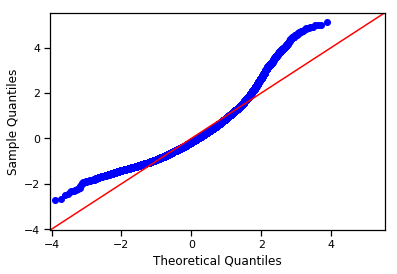

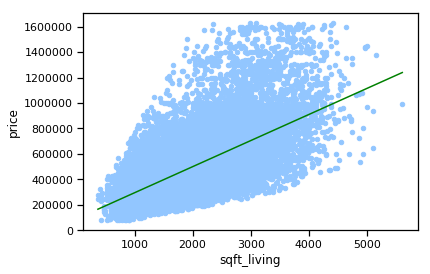

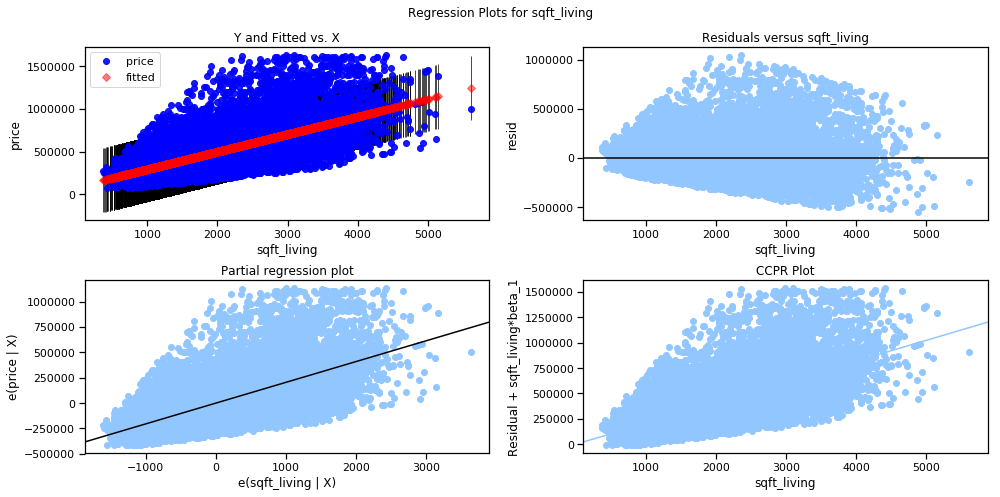

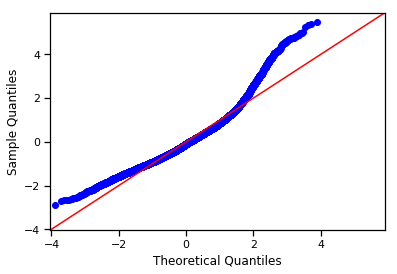

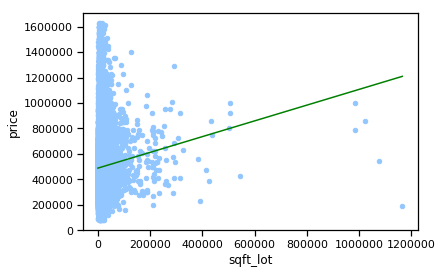

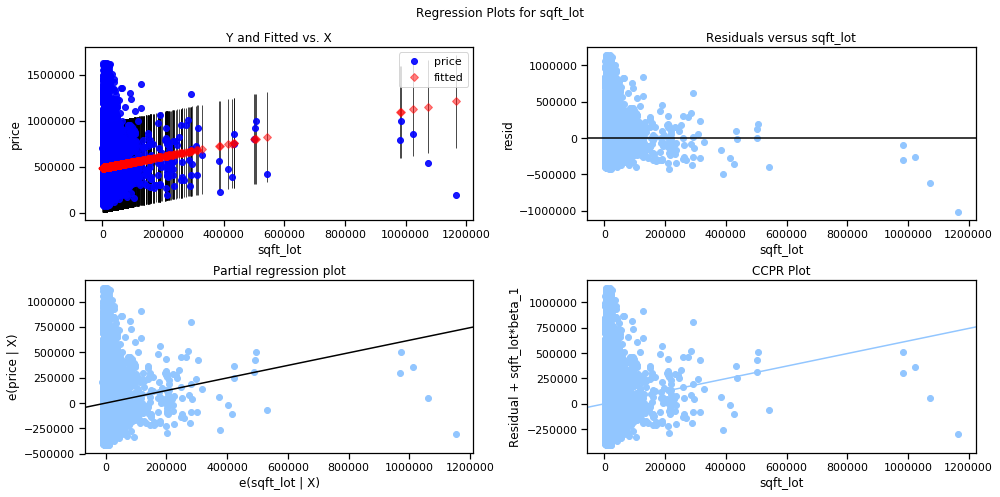

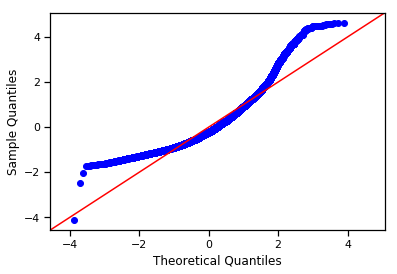

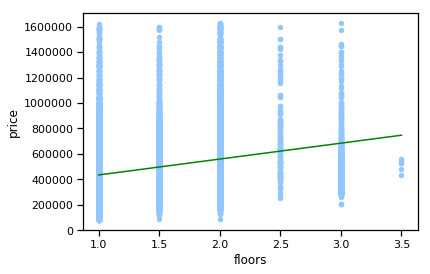

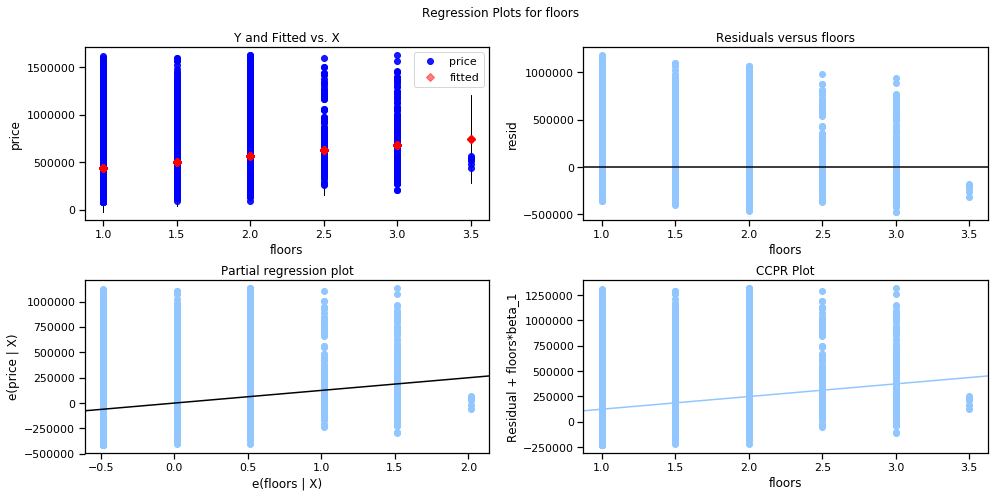

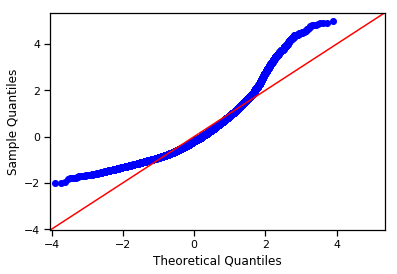

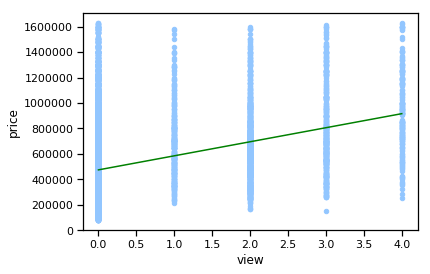

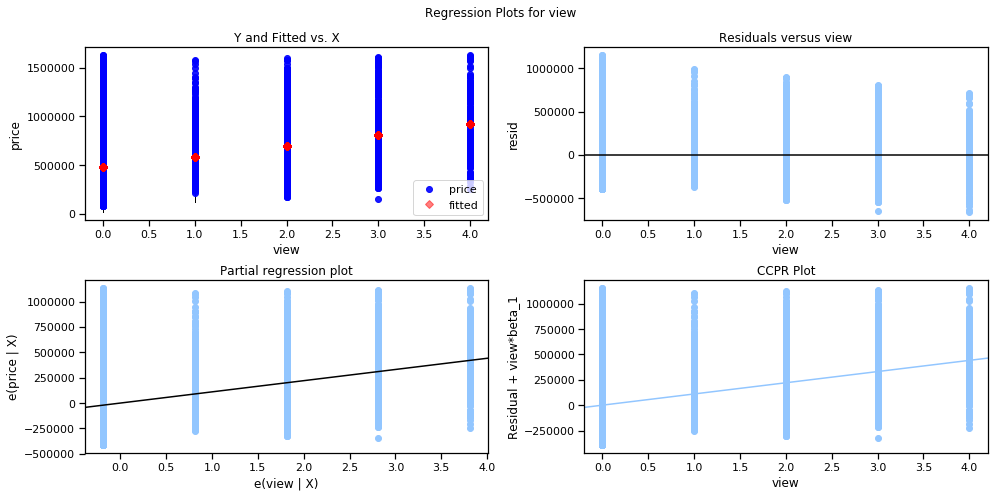

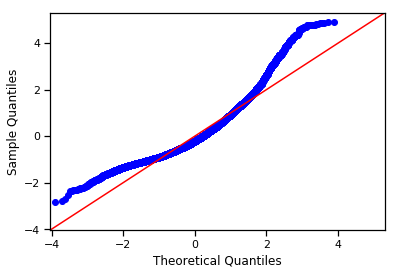

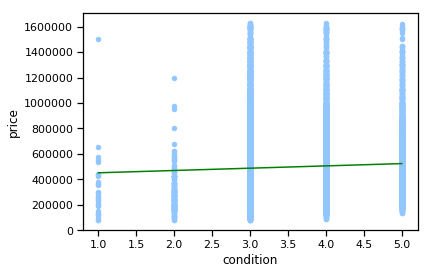

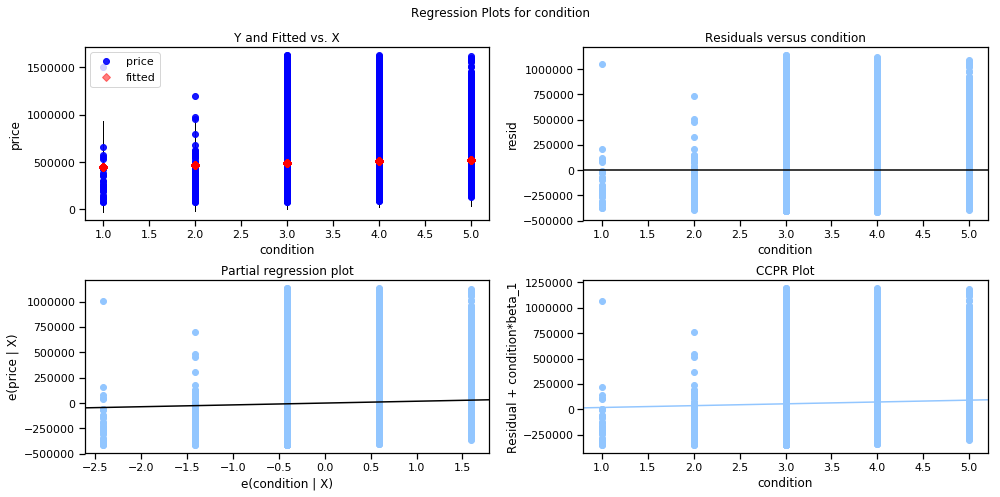

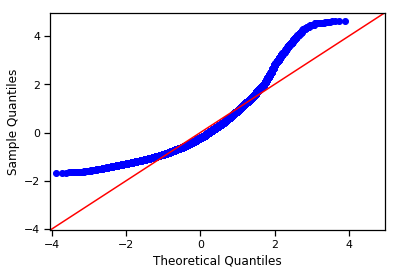

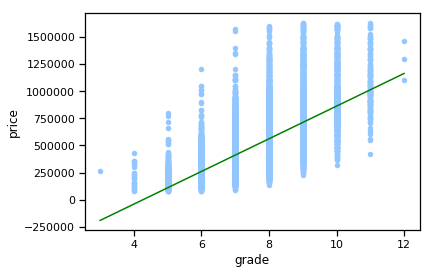

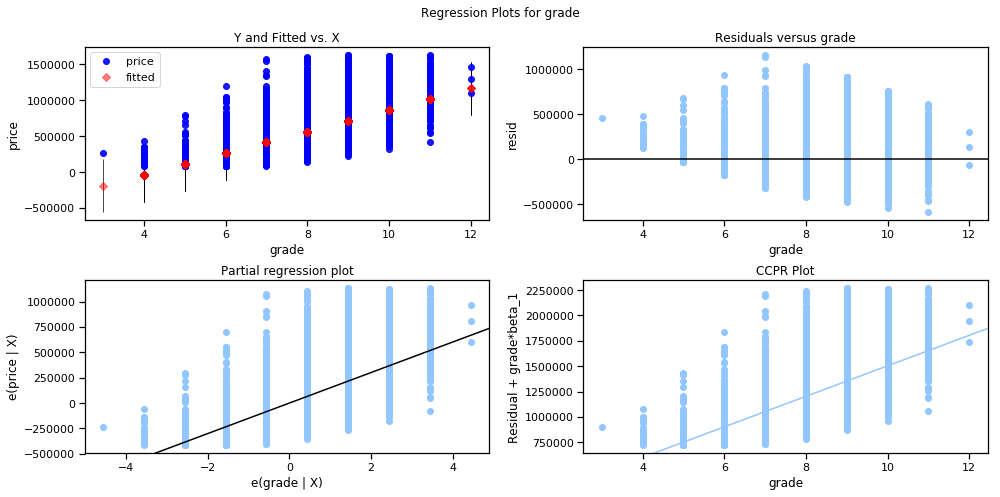

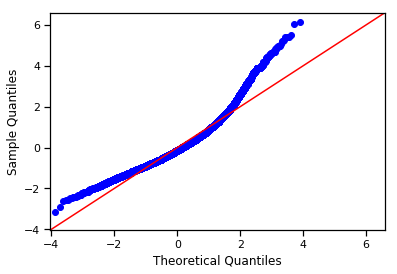

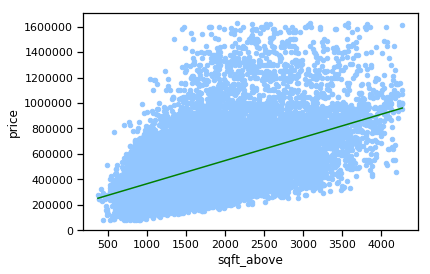

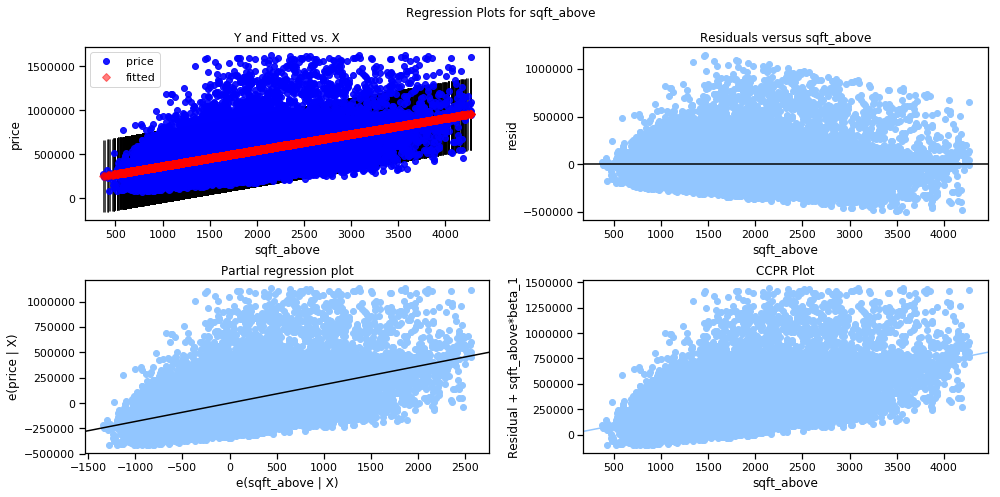

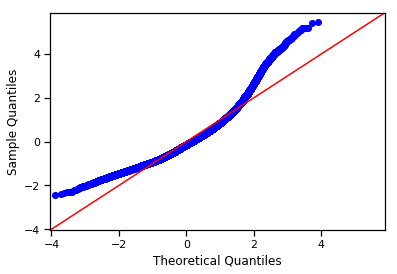

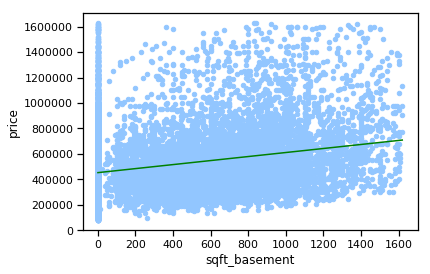

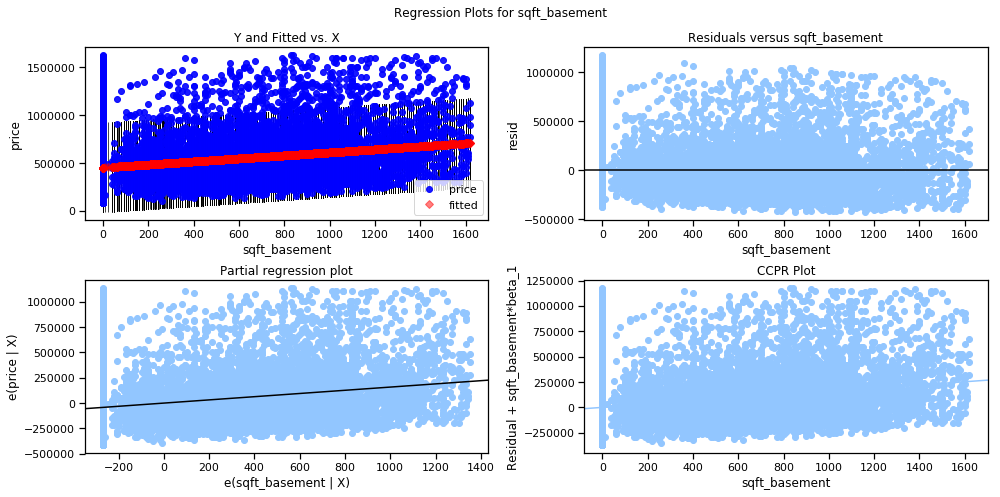

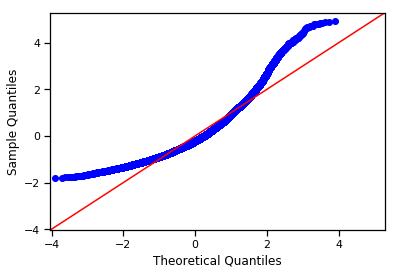

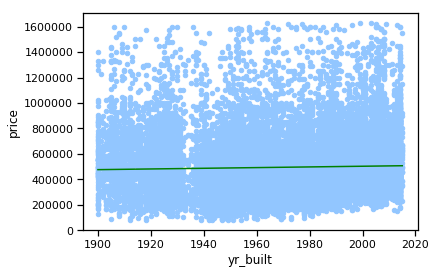

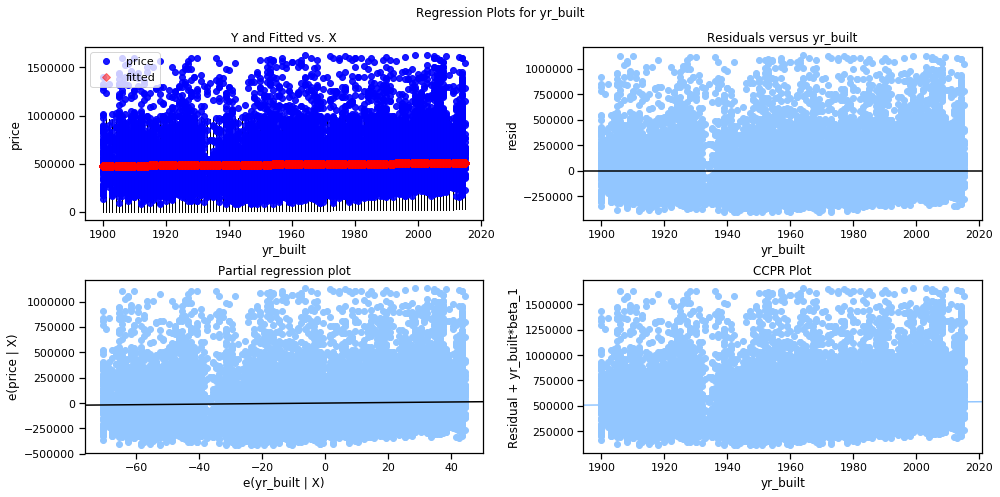

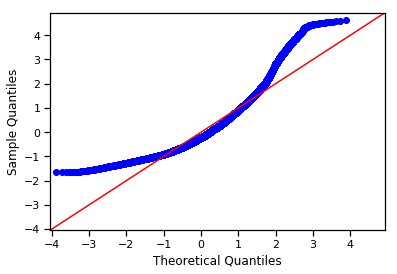

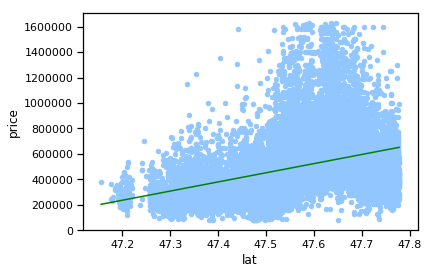

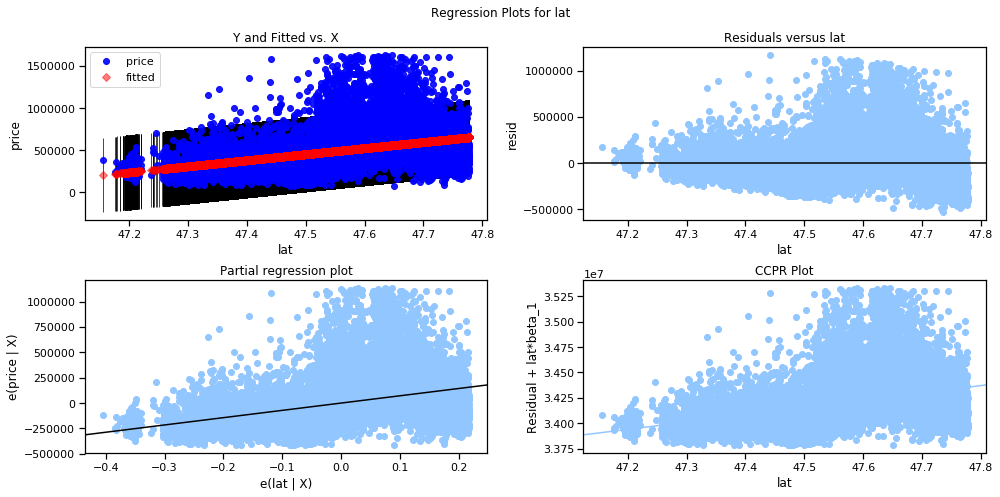

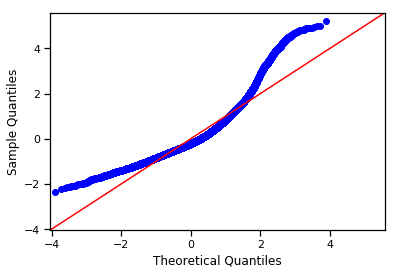

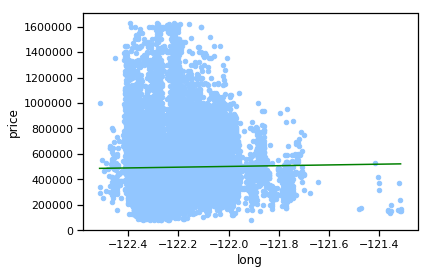

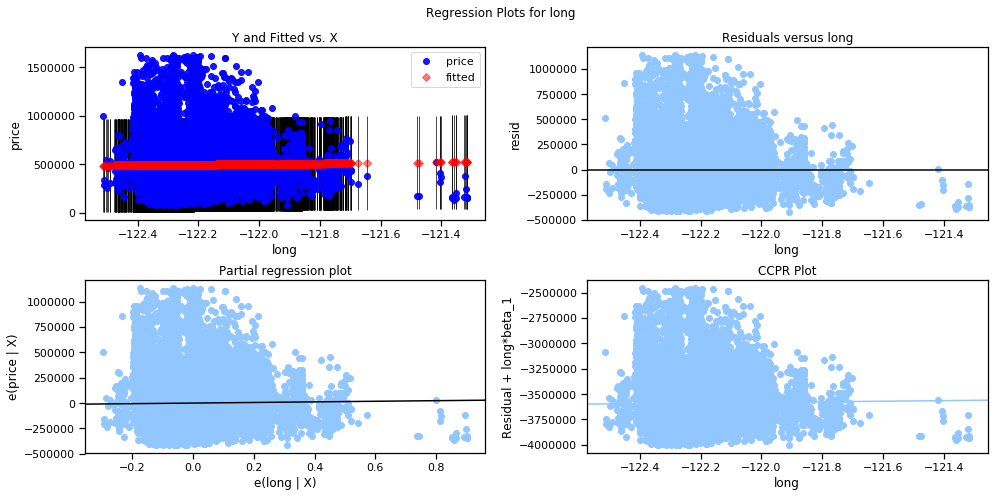

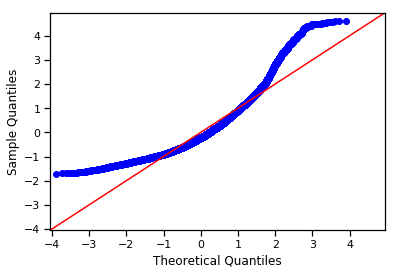

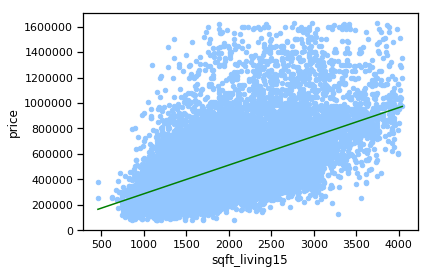

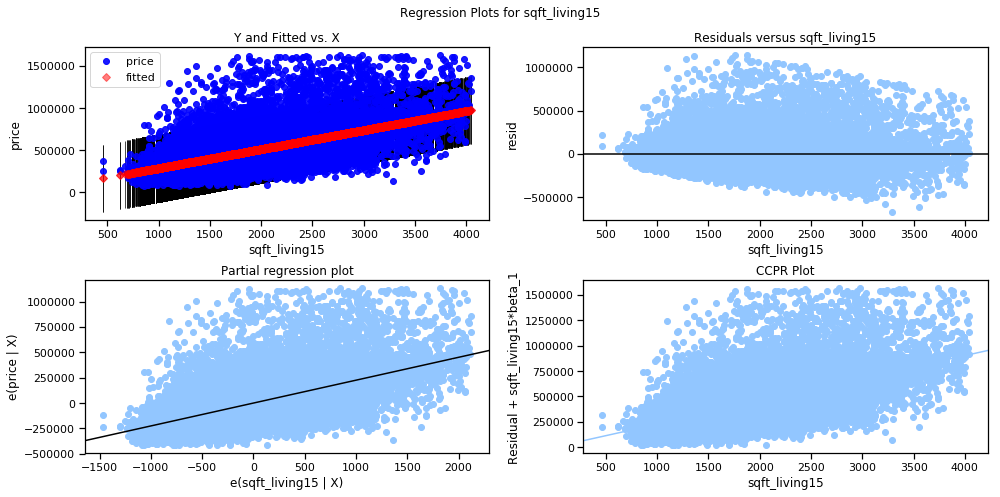

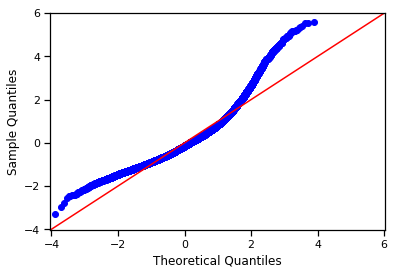

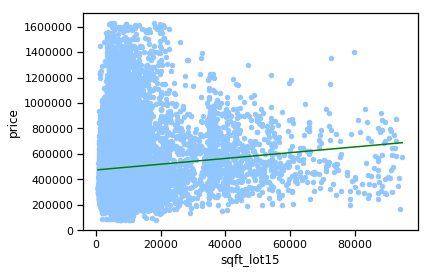

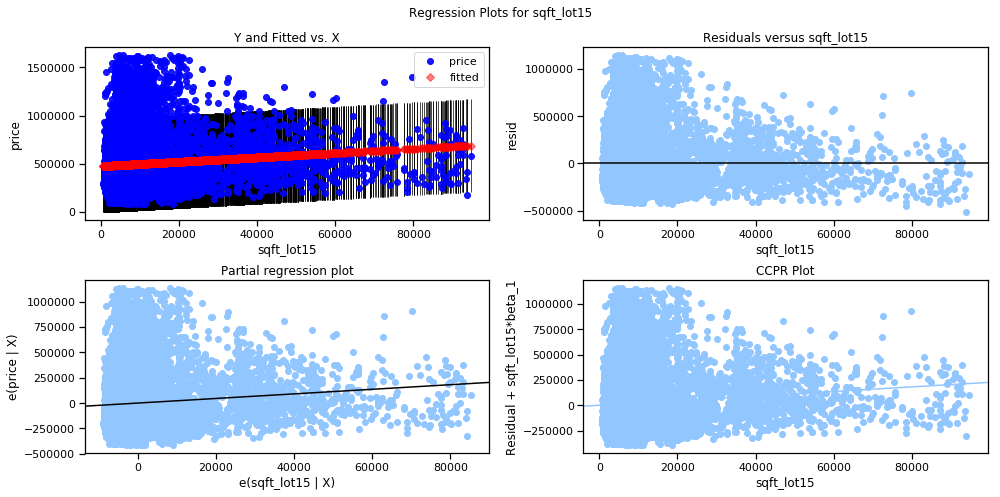

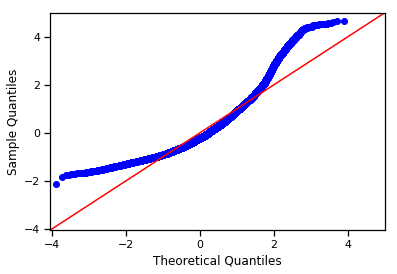

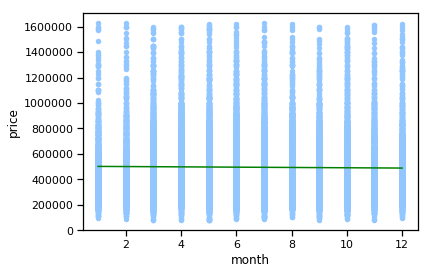

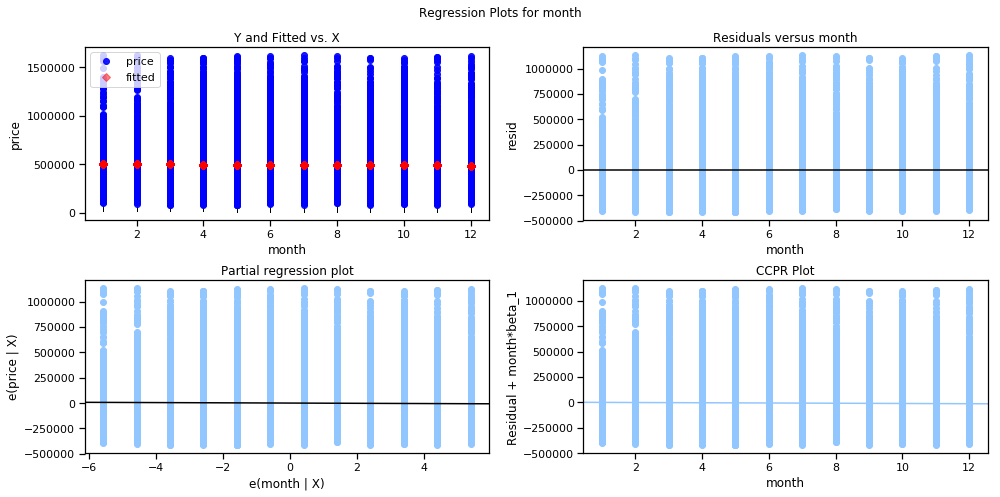

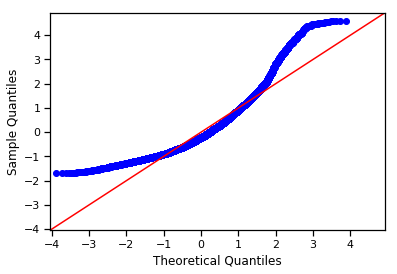

In [34]:
#the following code will allow us to check our assumptions for regression:
#1. Is there linearity between the independent and dependent variable?
#2. Are the residuals normally distributed?
#3. Are the error terms homoskedastic?

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]
for idx, val in enumerate(df.drop(['price'], axis=1).columns):
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='green')
    plt.show()
    fig = plt.figure(figsize=(14,7))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    results.append([val, model.rsquared, model.params[0],model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

Quick analysis:
- Bedrooms - positively related to price. Slight heteroskedasticity - more likely to have negative error with more bedrooms and vice versa. The residuals are not normally distributed.
- Bathrooms - positively related to price. No clear heteroskedasticity. The QQ plot shows that residuals are not very normally distributed.
- Sqft_living - positive relationship to price. Some heteroskedasticity - there is more variance as the independent variable approaches the mean. Relatively normal in the QQ plot, with some right skew.
- Sqft_lot - some positive relationship, but outliers are really messing with the initial regression. Errors seem slightly heteroskedastic. The QQ plot shows that residuals are not very normally distributed.
- Floors - positive relationship to price. Slight heteroskedasticity. The QQ plot shows that residuals are not very normally distributed.
- View - positive relationship to price. Slight heteroskedasticity. The QQ plot shows that residuals are not very normally distributed.
- Condition - Slight positive relationship with price. Significnat heteroskedastic, but important to remember there are few (~1%) of homes in the 1 or 2 bin. QQ plot shows a thin left tail which hurts normality.
- Grade - appears to be a strong positive relationship between grade and price. There is a lack of homoskedasticity. The QQ plot shows some right skew to the data.
- Sqft_above - positive relationship to price. Fairly homoskedastic. Normality is questionable, a log transformtion could be helpful.
- Sqft_basement - positive relationship to price. Fairly homoskedastic. Normality is questionable, a log transformtion could be helpful.
- yr_built - almost no linear relationship. Homoskedastic. The QQ plot shows that residuals are not very normally distributed.
- Sqft_living15 - positive relationship with price. The residuals are heteroskedastic. Normality is far from perfect.
- Sqft_lot15 - positive relationship to price. Fairly homoskedastic. Normality is questionable, a log transformtion could be helpful.
- Month - almost no linear relationship. Homoskedastic. The QQ plot shows that residuals are not very normally distributed.

#### Question:
How related are the independent variables to each other? In other words, what is the multicolinearity of the variables?

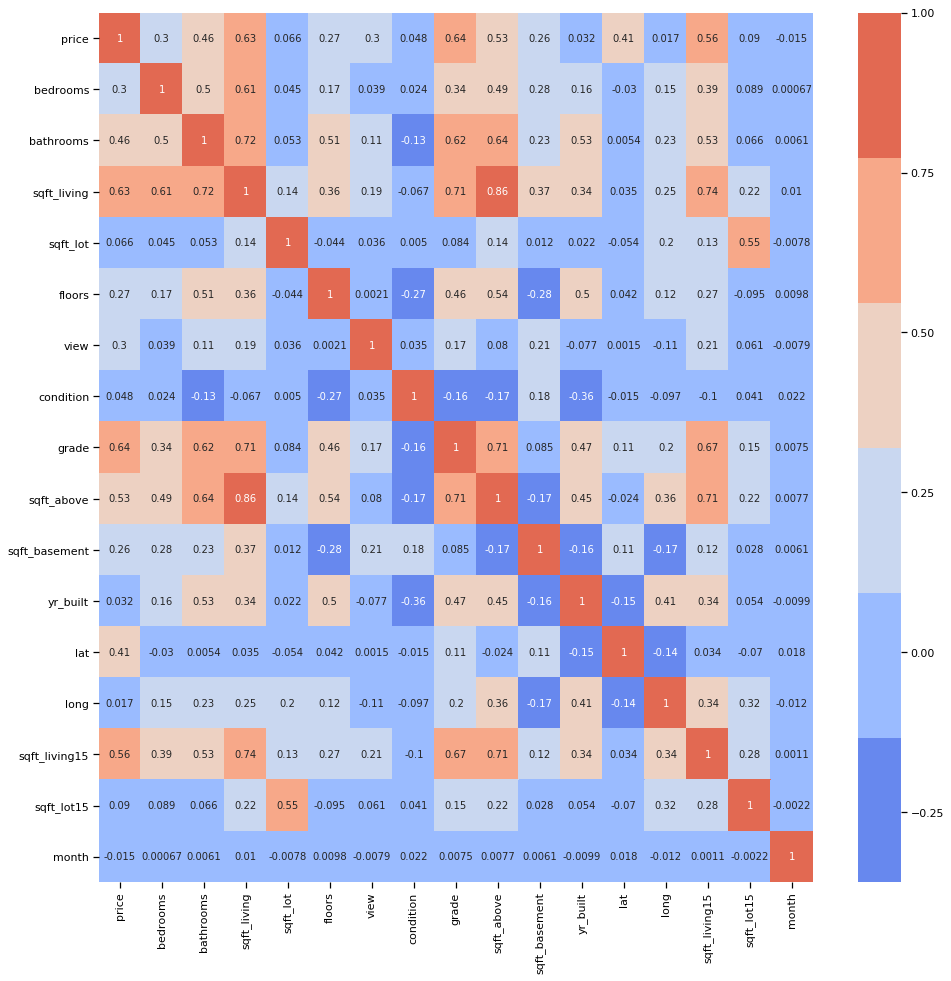

In [35]:
#the properties of one-hot encoded dummy variables are such that I do not have to include the 
#dummied categorical variables in my check for multicoliniarity
corr = df.corr() 
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

#### Answer:
Sqft_living seems to have the highest colinearity with other variables, and has correlation with other variables > 0.75. I will remove it and run the heat map a second time.

In [36]:
df = df.drop(['sqft_living'], axis=1)
df_with_cat = df_with_cat.drop(['sqft_living'], axis=1)

In [37]:
df_with_cat['water_1'] = df_with_cat['water_1.0']
df_with_cat['water_2'] = df_with_cat['water_2.0']
df_with_cat = df_with_cat.drop(['water_1.0', 'water_2.0'], axis=1)

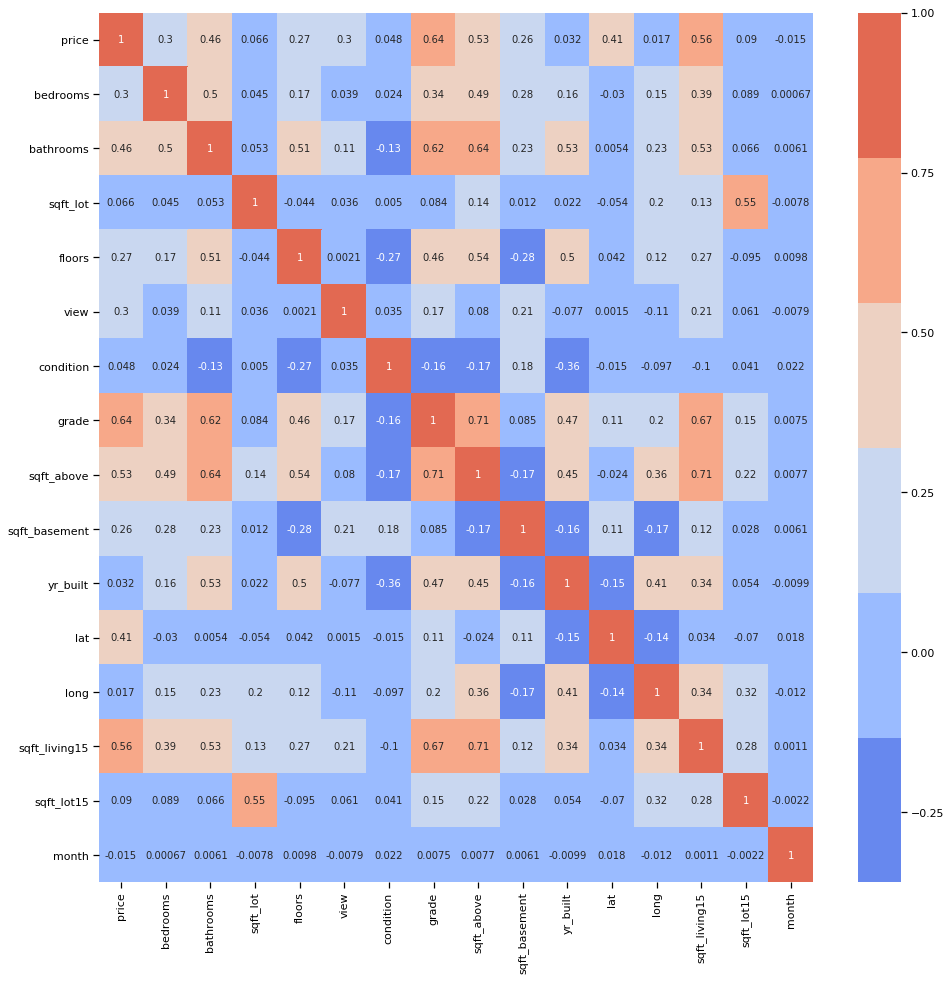

In [38]:
corr = df.corr() #remap the correlation without sqft_living
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

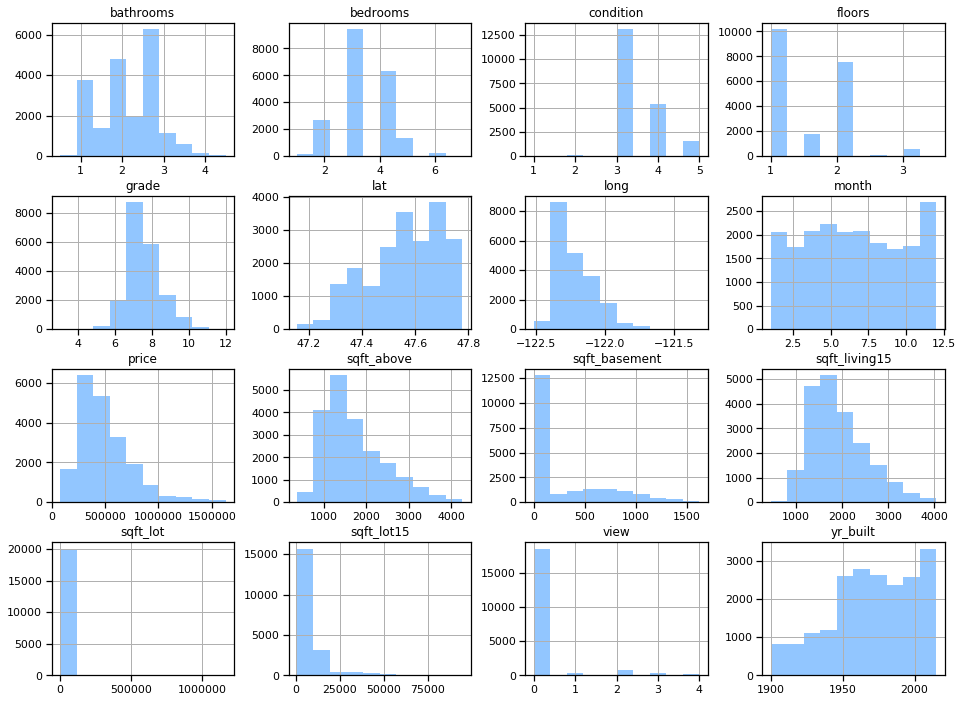

In [39]:
df.hist(figsize=(16,12));

I will now run a mulitvariate regression model to see how the data impact each other

In [40]:
#initial regression. I remove price from the df because it would have coeff. of 100.
outcome = 'price'
x_cols = df_with_cat.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_with_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1111.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:04:22   Log-Likelihood:            -2.6156e+05
No. Observations:               20205   AIC:                         5.233e+05
Df Residuals:                   20115   BIC:                         5.240e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.548e+07   4.18e+06     -3.703      0.000   -2.37e+07   -7.29e+06
bedrooms      -8915.9461   1097.629     -8.123      0.000   -1.11e+04   -6764.503
bathrooms      2.017e+04   1776.067     11.358      0.000    1.67e+04    2.37e+04
sqft_lot          0.2648      0.033      8.050      0.000       0.200       0.329
floors        -1.921e+04   2106.908     -9.117      0.000   -2.33e+04   -1.51e+04
view           4.553e+04   1232.968     36.924      0.000    4.31e+04    4.79e+04
condition      2.432e+04   1244.846     19.541      0.000    2.19e+04    2.68e+04
grade          5.227e+04   1224.369     42.689      0.000    4.99e+04    5.47e+04
sqft_above      134.2077      2.241     59.875      0.000     129.814     138.601
sqft_basement    81.9983      2.594     31.614      0.000      76.914      87.082
yr_built       -671.8528     40.697    -16.509      0.000    -751.622    -592.084
lat            1.139e+05   4.27e+04      2.667      0.008    3.02e+04    1.98e+05
long          -8.959e+04   3.09e+04     -2.901      0.004    -1.5e+05   -2.91e+04
sqft_living15    25.9403      2.072     12.522      0.000      21.880      30.001
sqft_lot15        0.1437      0.102      1.407      0.159      -0.057       0.344
month          -918.8153    320.962     -2.863      0.004   -1547.928    -289.702
seas_2         3748.6582   2652.236      1.413      0.158   -1449.942    8947.258
seas_3         1.945e+04   2721.374      7.148      0.000    1.41e+04    2.48e+04
seas_4         1500.7640   2195.815      0.683      0.494   -2803.214    5804.742
zip_98002      2.158e+04   9272.682      2.328      0.020    3408.113    3.98e+04
zip_98003     -1.035e+04   8306.195     -1.246      0.213   -2.66e+04    5932.740
zip_98004      5.799e+05   1.59e+04     36.364      0.000    5.49e+05    6.11e+05
zip_98005      3.026e+05   1.67e+04     18.092      0.000     2.7e+05    3.35e+05
zip_98006      2.505e+05   1.38e+04     18.208      0.000    2.24e+05    2.78e+05
zip_98007      2.278e+05   1.71e+04     13.299      0.000    1.94e+05    2.61e+05
zip_98008      2.219e+05   1.64e+04     13.570      0.000     1.9e+05    2.54e+05
zip_98010      1.064e+05   1.48e+04      7.211      0.000    7.75e+04    1.35e+05
zip_98011      9.348e+04   2.14e+04      4.378      0.000    5.16e+04    1.35e+05
zip_98014      1.087e+05   2.44e+04      4.461      0.000    6.09e+04    1.56e+05
zip_98019      7.458e+04   2.32e+04      3.211      0.001    2.91e+04     1.2e+05
zip_98022      3.315e+04   1.31e+04      2.532      0.011    7483.086    5.88e+04
zip_98023     -3.304e+04   7679.664     -4.303      0.000   -4.81e+04    -1.8e+04
zip_98024      1.513e+05   2.18e+04      6.926      0.000    1.08e+05    1.94e+05
zip_98027      1.842e+05    1.4e+04     13.111      0.000    1.57e+05    2.12e+05
zip_98028      8.088e+04   2.08e+04      3.893   

Train and test

In [41]:
#We now want to take a subset of the data to train the model. We then see if the remainder of the data can be used as a test
# to produce similar results.
y = df_with_cat[['price']] #set y to the dependent variable price
X = df_with_cat.drop(['price'], axis=1) #set X to the independent variables

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #the test size is 20% of the data set
print(len(X_train), len(X_test), len(y_train), len(y_test))

16164 4041 16164 4041


In [43]:
from sklearn.linear_model import LinearRegression #using sklearn to run a linear regression on both the train and test sets
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#need to calculate and compare the MSE for the two sets. If they are wildly different, we would know we have a problem - 
# the model would be considered overfit
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train) 
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Sq Err:', mse_train)
print('Test Mean Sq Err:', mse_test)

Train Mean Sq Err: price    1.023114e+10
dtype: float64
Test Mean Sq Err: price    1.050455e+10
dtype: float64


# Feature Engineering and building a better predictive model

Use data transformations to build a better model

In [48]:
#I want to log transform a few variables to better normalize them
price = np.log(df_with_cat.price)
sqft_above = np.log(df_with_cat['sqft_above'])
sqft_living15 = np.log(df_with_cat.sqft_living15)

df_with_cat = df_with_cat.drop(['price', 'sqft_above', 'sqft_living15', 'lat', 'long'], axis=1)

df_transformed = pd.DataFrame([])
df_transformed['price'] = price
df_transformed['sqft_above'] = sqft_above
df_transformed['sqft_living15'] = sqft_living15

df_final = pd.concat([df_with_cat, df_transformed], axis=1)

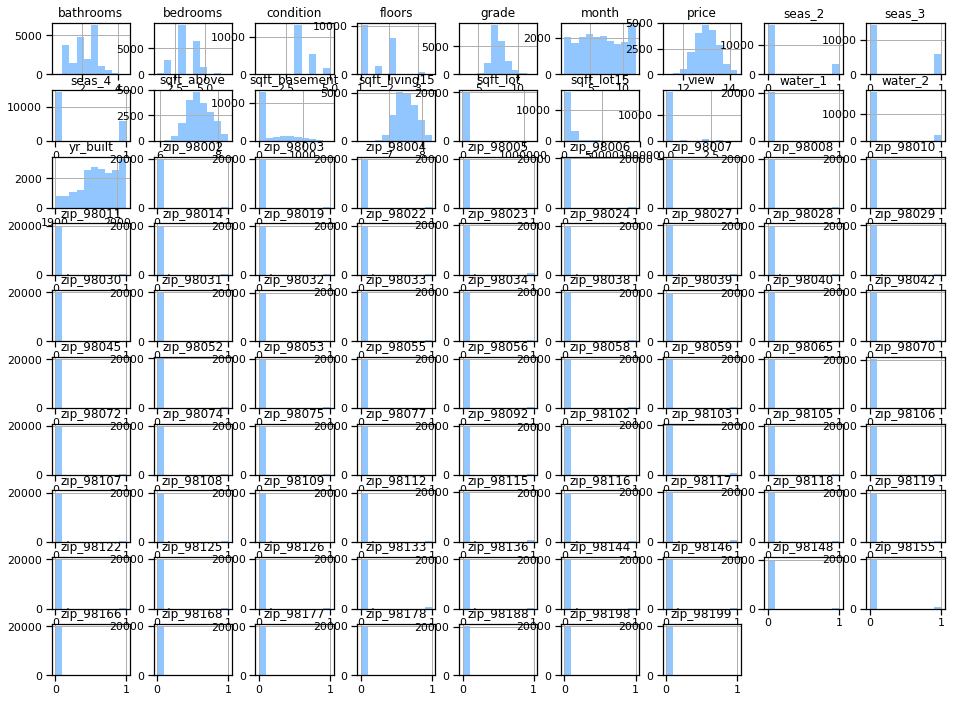

In [49]:
df_final.hist(figsize=(16,12));

In [50]:
#I need to run another regression with the transformed variables and hope to see an increased R^2
outcome = 'price'
x_cols = df_final.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1451.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:10:49   Log-Likelihood:                 6469.2
No. Observations:               20205   AIC:                        -1.276e+04
Df Residuals:                   20117   BIC:                        -1.207e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.5901      0.154     55.903      0.000       8.289       8.891
bedrooms         -0.0096      0.002     -4.940      0.000      -0.013      -0.006
bathrooms         0.0407      0.003     13.130      0.000       0.035       0.047
sqft_lot       6.167e-07    5.7e-08     10.825      0.000    5.05e-07    7.28e-07
floors           -0.0401      0.004    -10.905      0.000      -0.047      -0.033
view              0.0583      0.002     27.356      0.000       0.054       0.062
condition         0.0526      0.002     24.393      0.000       0.048       0.057
grade             0.0906      0.002     43.379      0.000       0.086       0.095
sqft_basement     0.0001   4.44e-06     31.240      0.000       0.000       0.000
yr_built         -0.0007   7.04e-05     -9.727      0.000      -0.001      -0.001
sqft_lot15     5.883e-07   1.75e-07      3.356      0.001    2.45e-07    9.32e-07
month            -0.0015      0.001     -2.785      0.005      -0.003      -0.000
seas_2            0.0090      0.005      1.957      0.050   -1.24e-05       0.018
seas_3            0.0405      0.005      8.581      0.000       0.031       0.050
seas_4            0.0043      0.004      1.143      0.253      -0.003       0.012
zip_98002        -0.0199      0.016     -1.262      0.207      -0.051       0.011
zip_98003         0.0113      0.014      0.794      0.427      -0.017       0.039
zip_98004         1.0676      0.015     69.725      0.000       1.038       1.098
zip_98005         0.7290      0.017     41.819      0.000       0.695       0.763
zip_98006         0.6272      0.013     48.249      0.000       0.602       0.653
zip_98007         0.6358      0.018     35.704      0.000       0.601       0.671
zip_98008         0.6328      0.014     44.381      0.000       0.605       0.661
zip_98010         0.2555      0.021     11.961      0.000       0.214       0.297
zip_98011         0.4422      0.016     27.834      0.000       0.411       0.473
zip_98014         0.3093      0.021     15.057      0.000       0.269       0.350
zip_98019         0.3252      0.017     19.699      0.000       0.293       0.358
zip_98022         0.0246      0.016      1.538      0.124      -0.007       0.056
zip_98023        -0.0324      0.012     -2.622      0.009      -0.057      -0.008
zip_98024         0.4285      0.026     16.532      0.000       0.378       0.479
zip_98027         0.5119      0.013     38.448      0.000       0.486       0.538
zip_98028         0.4062      0.014     28.655      0.000       0.378       0.434
zip_98029         0.5916      0.014     42.821      0.000       0.565       0.619
zip_98030         0.0424      0.015      2.916      0.004       0.014       0.071
zip_98031         0.0663      0.014      4.652      0.000       0.038       0.094
zip_98032        -0.0272      0.019     -1.464   

I am using code from the lesson to optimize using stepwise selection with p-values:

In [51]:
#the below code will help us remove any independent variables that presented with a p-value > 0.05 in the regression model.

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [52]:
#this is where I get my list of variables to keep
columns = df_final.drop(['price'], axis=1)
result = stepwise_selection(columns, df_final.price, verbose = True)
print('resulting features:')
print(result)

Add  bathrooms                      with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  grade                          with p-value 0.0
Add  zip_98023                      with p-value 7.67818e-228
Add  zip_98004                      with p-value 1.54134e-163
Add  zip_98003                      with p-value 2.20991e-119
Add  zip_98042                      with p-value 6.4615e-128
Add  zip_98092                      with p-value 5.00669e-137
Add  zip_98168                      with p-value 1.41188e-104
Add  zip_98002                      with p-value 1.11834e-104
Add  zip_98058                      with p-value 4.2208e-110
Add  zip_98030                      with p-value 5.33537e-113
Add  zip_98031                      with p-value 3.16573e-119
Add  zip_98198                      with p-value 3.4515e-126
Add  zip_98038                      with p-value 1.61688

C:\Users\zazue\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop zip_98146                      with p-value 0.132936
Add  zip_98065                      with p-value 1.20541e-22
Add  zip_98028                      with p-value 1.39311e-26
Add  floors                         with p-value 1.32102e-20
Add  zip_98106                      with p-value 9.94268e-16
Add  zip_98059                      with p-value 7.16901e-13
Add  zip_98108                      with p-value 4.39984e-15
Add  zip_98056                      with p-value 7.13155e-14
Add  zip_98045                      with p-value 1.2349e-17
Add  zip_98024                      with p-value 5.01256e-18
Add  zip_98019                      with p-value 8.732e-19
Add  zip_98166                      with p-value 1.05469e-24
Drop zip_98038                      with p-value 0.228557
Add  zip_98146                      with p-value 5.70852e-35
Drop zip_98055                      with p-value 0.565388
Add  zip_98014                      with p-value 5.90767e-23
Drop zip_98188                      

The stepwise selection optimizes the model without the sqft_above independent variable, which could have been anticipated, given the p-value of .841 in our regression model. The p-values provided are all statistically significant at the 95% confidence interval

Final regression:

In [53]:
final_data = df_final[['price', 'grade', 'yr_built', 'sqft_living15', 'bathrooms', 'zip_98023', 'zip_98004', 'zip_98092', 
                       'zip_98003', 'zip_98058', 'zip_98002', 'zip_98032', 'zip_98178', 'view', 'sqft_above', 
                       'sqft_basement', 'zip_98033', 'zip_98112', 'zip_98115', 'zip_98103', 'zip_98117', 'zip_98040', 
                       'zip_98105', 'zip_98199', 'zip_98119', 'zip_98107', 'condition', 'zip_98116', 'zip_98122', 
                       'zip_98109', 'zip_98102', 'zip_98052', 'water_1', 'zip_98136', 'zip_98053', 'zip_98005', 
                       'zip_98039', 'zip_98144', 'zip_98006', 'zip_98008', 'seas_3', 'zip_98029', 'zip_98125', 'zip_98075', 
                       'zip_98074', 'zip_98034', 'zip_98126', 'zip_98007', 'zip_98177', 'zip_98027', 'sqft_lot', 
                       'zip_98072', 'zip_98133', 'zip_98118', 'zip_98155', 'zip_98077', 'zip_98011', 'zip_98065', 
                       'zip_98028', 'floors', 'zip_98106', 'zip_98059', 'zip_98108', 'zip_98056', 'zip_98045', 'zip_98024', 
                       'zip_98019', 'zip_98166', 'zip_98146', 'zip_98014', 'zip_98070', 'zip_98010', 'zip_98038', 
                       'zip_98055', 'bedrooms', 'month', 'zip_98148', 'zip_98168', 'zip_98188', 'sqft_lot15']]

outcome = 'price'
x_cols = final_data.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=final_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1596.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:17:26   Log-Likelihood:                 6450.9
No. Observations:               20205   AIC:                        -1.274e+04
Df Residuals:                   20125   BIC:                        -1.211e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.6349      0.153     56.403      0.000       8.335       8.935
grade             0.0907      0.002     43.445      0.000       0.087       0.095
yr_built         -0.0007   7.03e-05     -9.724      0.000      -0.001      -0.001
sqft_living15     0.1770      0.007     26.245      0.000       0.164       0.190
bathrooms         0.0407      0.003     13.139      0.000       0.035       0.047
zip_98023        -0.0742      0.009     -8.207      0.000      -0.092      -0.056
zip_98004         1.0253      0.013     80.213      0.000       1.000       1.050
zip_98092        -0.0452      0.011     -4.150      0.000      -0.066      -0.024
zip_98003        -0.0306      0.011     -2.660      0.008      -0.053      -0.008
zip_98058         0.1131      0.009     12.050      0.000       0.095       0.132
zip_98002        -0.0618      0.013     -4.631      0.000      -0.088      -0.036
zip_98032        -0.0690      0.017     -4.160      0.000      -0.101      -0.036
zip_98178         0.1101      0.012      9.233      0.000       0.087       0.134
view              0.0581      0.002     27.408      0.000       0.054       0.062
sqft_above        0.4136      0.007     59.807      0.000       0.400       0.427
sqft_basement     0.0001   4.44e-06     31.239      0.000       0.000       0.000
zip_98033         0.7274      0.010     74.497      0.000       0.708       0.747
zip_98112         0.9510      0.013     72.147      0.000       0.925       0.977
zip_98115         0.7702      0.009     86.213      0.000       0.753       0.788
zip_98103         0.7753      0.009     85.622      0.000       0.758       0.793
zip_98117         0.7724      0.009     84.635      0.000       0.755       0.790
zip_98040         0.8205      0.013     63.552      0.000       0.795       0.846
zip_98105         0.8792      0.013     65.571      0.000       0.853       0.905
zip_98199         0.8038      0.011     70.357      0.000       0.781       0.826
zip_98119         0.9126      0.015     62.759      0.000       0.884       0.941
zip_98107         0.7971      0.012     65.441      0.000       0.773       0.821
condition         0.0528      0.002     24.560      0.000       0.049       0.057
zip_98116         0.7228      0.011     65.031      0.000       0.701       0.745
zip_98122         0.7532      0.012     63.077      0.000       0.730       0.777
zip_98109         0.9202      0.018     50.054      0.000       0.884       0.956
zip_98102         0.9046      0.019     47.907      0.000       0.868       0.942
zip_98052         0.5902      0.009     68.438      0.000       0.573       0.607
water_1           0.4560      0.022     20.633      0.000       0.413       0.499
zip_98136         0.6479      0.012     53.699      0.000       0.624       0.672
zip_98053         0.5579      0.011     52.931   

While the above regression returned an R^2 slightly smaller than the previous one, it did not include any independent variables that had large p-values that did not allow us to reject the null hypothesis.

In [54]:
#I'll repeat the steps for the train-test split
y = final_data[['price']]
X = final_data.drop(['price'], axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16164 4041 16164 4041


In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Sq Err:', mse_train)
print('Test Mean Sq Err:', mse_test)

Train Mean Sq Err: price    0.031188
dtype: float64
Test Mean Sq Err: price    0.029986
dtype: float64


#### Analysis

86.2 percent of the variance in the dependent variable 'price' can be explained by the independent variables.

Each of the following statements describing impact of change in an independent variable assumes all other variables are held constant.
- There are many zipcodes that have enormous impact on price. I'll list a few of those out in my analysis.
- In real dollar terms, the intercept is ~$5,625
- Waterfront status will increase price by 46%
- Every time the home is viewed, sale price incresases 5.8%
- For each additional full bathroom a home has, price will increase by 4.1%.
- Home price increases 5.3% for each additional point of condition above 0.
- Homes sold in the spring (seas_3) tend to have a 3.5% higher price.
- As material (grade) of the home is improved by one unit of measure, the sell price of the home jumps 9.1%.
- A 1% increase in living space of a home measured in 2015 (sqft_living15) leads to a .18% increase in price, holding all other variables constant.
- A 1% increase in the square footage of living space at or above ground level will lead to about a .41% increase in home price.

The difference in MSE between the train and test models was ~3.8%

- Train Mean Sq Err: price    0.031188
- Test Mean Sq Err: price    0.029986

# Data Visualization

Generating meaningful views for the business presentation. I can still use the 'df' dataframe to split the data, since no information was dropped post-cleaning.

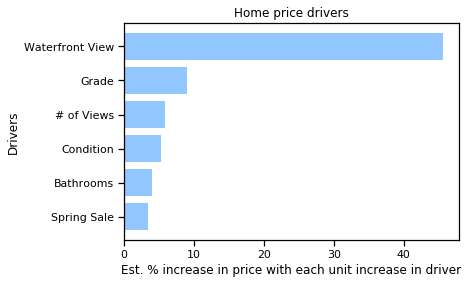

In [81]:
#I want to generate a chart that shows the non-zipcode related independent variables that had the highest impact on price
x = [3.45, 4.07, 5.28, 5.81, 9.07, 45.6]
bars = ('Spring Sale', 'Bathrooms', 'Condition', '# of Views', 'Grade', 'Waterfront View')
ypos = np.arange(len(bars))

plt.barh(ypos, x)
plt.yticks(ypos, bars)
plt.title('Home price drivers')
plt.xlabel('Est. % increase in price with each unit increase in driver')
plt.ylabel('Drivers')
plt.savefig('drivers.png')
plt.show()

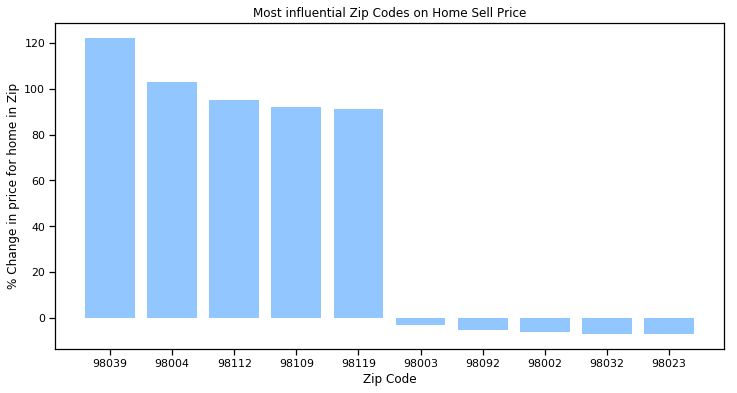

In [58]:
#I want to create a chart that shows how 10 zipcodes impacted price to move above or below expected values.
Zips = ['98039', '98004', '98112', '98109', '98119', '98003', '98092', '98002', '98032', '98023']
Price_impact = [1.215443, 1.025329, .9510244, .9201953, .9125514, -.03058512, -.04515757, -.06177182, -.06895656, -.07419269]
PI_round = []
for i in Price_impact:
    PI_round.append(round(i,2)*100)
PI_round

from matplotlib.pyplot import figure
figure(figsize=(12,6))

y_pos = np.arange(len(Zips))

plt.bar(y_pos, PI_round)
plt.xticks(y_pos, Zips)
plt.ylabel('% Change in price for home in Zip')
plt.xlabel('Zip Code')
plt.title('Most influential Zip Codes on Home Sell Price')
plt.show()

I want to use the small df (n=343) of duplicated homes to see what the YOY resale price was. The sample size is large enough (n>20) that I feel comfortable using this as a representative population for resale analysis.

In [61]:
#I want to dig into the duplicated homes that had resold in the time period examined. I will need to look at the home sales
# in order of when they were sold, so I have to order them by date.
id_duplicates = id_duplicates.sort_values(by=['id', 'date'])

In [62]:
#Because I am most interested in price to tell investors what they might expect on a return, I discard other variables.
id_duplicates2 = id_duplicates.drop(['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month'], axis=1)

In [63]:
#I split the data by dropping the latter sales, then by dropping the first (and second) sales. I then subtract the last
# sales from the first and take the mean to get the average ROI.
id_duplicates_first = id_duplicates2.drop_duplicates('id', keep='first')
id_duplicates_last = id_duplicates2.drop_duplicates('id', keep='last')
id_duplicates_delta = pd.merge(id_duplicates_first, id_duplicates_last, how='inner', on='id')
id_duplicates_delta['price'] = id_duplicates_delta['price_y'] - id_duplicates_delta['price_x']
round(id_duplicates_delta.price.mean(),2)

136567.62

In [64]:
id_duplicates3 = id_duplicates.drop(['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month'], axis=1)

In [65]:
#This code lets me see if there were any other significant changes made to those homes which had resold within the year.
#If something like condition was larger then maybe homes needed to be renovated to resell for more money.
id_duplicates_first3 = id_duplicates3.drop_duplicates('id', keep='first')
id_duplicates_last3 = id_duplicates3.drop_duplicates('id', keep='last')
id_duplicates_delta3 = pd.merge(id_duplicates_first3, id_duplicates_last3, how='inner', on='id')
id_duplicates_delta3['price'] = id_duplicates_delta3['price_y'] - id_duplicates_delta3['price_x']
id_duplicates_delta3.mean()

id              4.545319e+09
price_x         3.522120e+05
floors_x        1.267045e+00
waterfront_x    2.613636e-01
view_x          1.363636e-01
condition_x     3.301136e+00
grade_x         7.079545e+00
season_x        2.659091e+00
price_y         4.887796e+05
floors_y        1.267045e+00
waterfront_y    2.613636e-01
view_y          1.363636e-01
condition_y     3.301136e+00
grade_y         7.079545e+00
season_y        2.505682e+00
price           1.365676e+05
dtype: float64

I want to group the data by month and avg price and recommend a time of year to buy/sell.

In [66]:
df_month = df.groupby('month').mean()

In [67]:
#this allows me to see which months had the highest and lowest sell prices to determine when the best time to buy and sell
# might be
df_month = df_month.drop(['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

x = pd.DataFrame(round(df_month.nlargest(3, 'price'),2))
y = pd.DataFrame(round(df_month.nsmallest(3, 'price'),2))

In [68]:
#Since we have a full year of data, it is worth plotting a line graph to see how average sell price trends over the
# course of the year.

import plotly.graph_objects as go
import numpy as np

x = df_month.index
y = df_month.price

fig = go.Figure(data=go.Scatter(x=x, y=y))

fig.update_layout(
    title=go.layout.Title(
        text="Average Home Sale Price by Month",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Month",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Avg sale price",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

I was trying to make a map with the highest and lowest priced zipcodes but ultimately ran out of time.

In [70]:
#I needed to bring in a mapping library folium

import folium
import json
from folium import plugins
import os
print(folium.__version__)

0.9.1


In [75]:
#I generated a dictionary of the lat, long, and zipcodes for the area to represent how area impacts sell price.

high_and_low = {'long': [-122.2328, -122.2032, -122.2988, -122.3498, -122.3674, -122.3224, -122.1341, -122.2132, -122.2789, -122.3744],
                'lat': [47.6260, 47.6135, 47.6294, 47.6357, 47.6385, 47.3165, 47.2940, 47.3088, 47.3735, 47.3055],
                'zip': ['98039', '98004', '98112', '98109', '98119', '98003', '98092', '98002', '98032', '98023']}

In [79]:
m = folium.Map([47.5, -122.3336], zoom_start=10.25)

points = pd.DataFrame({'long': high_and_low['long'], 'lat': high_and_low['lat'], 'zip': high_and_low['zip']})

#I know this is a super inefficient way to do this - I ran out of time.
folium.Marker([47.6260, -122.2328], popup='98039',icon=folium.Icon(color='green')).add_to(m)
folium.Marker([47.6135, -122.2032], popup='98004',icon=folium.Icon(color='green')).add_to(m)
folium.Marker([47.6294, -122.2988], popup='98112',icon=folium.Icon(color='green')).add_to(m)
folium.Marker([47.6357, -122.3498], popup='98109',icon=folium.Icon(color='green')).add_to(m)
folium.Marker([47.6385, -122.3674], popup='98119',icon=folium.Icon(color='green')).add_to(m)
folium.Marker([47.3165, -122.3224], popup='98003').add_to(m)
folium.Marker([47.2940, -122.1341], popup='98092').add_to(m)
folium.Marker([47.3088, -122.2132], popup='98002').add_to(m)
folium.Marker([47.3735, -122.2789], popup='98032').add_to(m)
folium.Marker([47.3055, -122.3744], popup='98023').add_to(m)

m

--End of code--